<a href="https://colab.research.google.com/github/ADITHYA-M2002/personalized-diet-and-workout-reccomdation-system-using-machine-learning/blob/main/Personalized_Workout_and_Diet_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("sample_data/personalized_fitness_dataset.csv")

In [ ]:
# Encode categorical variables
df_model = df.copy()
label_encoders = {}
categorical_columns = ["Gender", "Activity_Level", "Diet_Preference", "Chronic_Conditions", "Fitness_Goal"]

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Define features and target
X = df_model.drop("Fitness_Goal", axis=1)
y = df_model["Fitness_Goal"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:48:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders["Fitness_Goal"].classes_)

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Tuned XGBoost Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost Accuracy: 23.50%

Classification Report:
                  precision    recall  f1-score   support

      Endurance       0.14      0.10      0.12        30
    Flexibility       0.23      0.24      0.24        42
General Fitness       0.28      0.16      0.21        43
    Muscle Gain       0.24      0.24      0.24        45
    Weight Loss       0.25      0.40      0.30        40

       accuracy                           0.23       200
      macro avg       0.23      0.23      0.22       200
   weighted avg       0.23      0.23      0.23       200



Best n_estimators: 190
Random Forest Accuracy: 28.00%

Classification Report:
                  precision    recall  f1-score   support

      Endurance       0.17      0.23      0.20        30
    Flexibility       0.33      0.24      0.28        42
General Fitness       0.31      0.23      0.27        43
    Muscle Gain       0.39      0.38      0.38        45
    Weight Loss       0.22      0.30      0.26        40

       accuracy                           0.28       200
      macro avg       0.29      0.28      0.28       200
   weighted avg       0.29      0.28      0.28       200



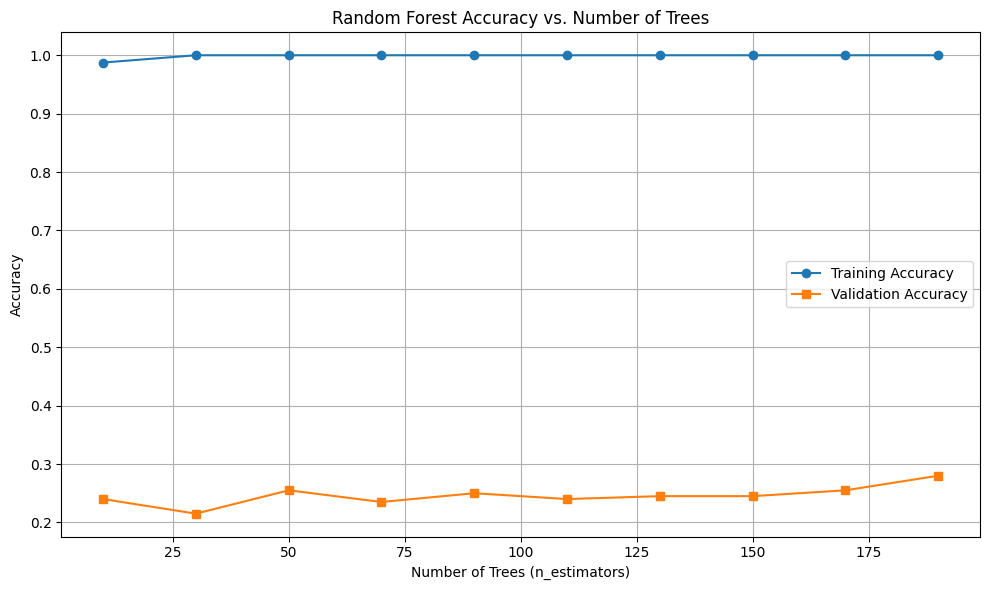

In [ ]:
# implementing random forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("sample_data/personalized_fitness_dataset.csv")

# Encode categorical variables
df_model = df.copy()
label_encoders = {}
categorical_columns = ["Gender", "Activity_Level", "Diet_Preference", "Chronic_Conditions", "Fitness_Goal"]

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Define features and target
X = df_model.drop("Fitness_Goal", axis=1)
y = df_model["Fitness_Goal"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest and collect accuracy for different estimators
train_accuracies = []
test_accuracies = []
estimators_range = range(10, 210, 20)

for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Final model with best estimator (based on accuracy)
best_n = estimators_range[np.argmax(test_accuracies)]
final_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
final_rf.fit(X_train, y_train)
y_pred = final_rf.predict(X_test)

# Classification report
print("Best n_estimators:", best_n)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders["Fitness_Goal"].classes_))

# Plot validation graph
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(estimators_range, test_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_validation_graph.png")
plt.show()

In [ ]:
pip install catboost pandas scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


0:	learn: 0.2812500	test: 0.2200000	best: 0.2200000 (0)	total: 165ms	remaining: 32.9s
10:	learn: 0.3775000	test: 0.2100000	best: 0.2400000 (6)	total: 798ms	remaining: 13.7s
20:	learn: 0.4650000	test: 0.1900000	best: 0.2400000 (6)	total: 1.25s	remaining: 10.7s
30:	learn: 0.5087500	test: 0.2000000	best: 0.2400000 (6)	total: 1.68s	remaining: 9.17s
40:	learn: 0.5887500	test: 0.2200000	best: 0.2400000 (6)	total: 2.13s	remaining: 8.25s
50:	learn: 0.6500000	test: 0.2000000	best: 0.2400000 (6)	total: 2.72s	remaining: 7.96s
60:	learn: 0.6887500	test: 0.1950000	best: 0.2400000 (6)	total: 2.92s	remaining: 6.64s
70:	learn: 0.7300000	test: 0.2350000	best: 0.2400000 (6)	total: 3.11s	remaining: 5.64s
80:	learn: 0.7912500	test: 0.2350000	best: 0.2450000 (71)	total: 3.29s	remaining: 4.84s
90:	learn: 0.8237500	test: 0.2350000	best: 0.2450000 (71)	total: 3.49s	remaining: 4.18s
100:	learn: 0.8575000	test: 0.2600000	best: 0.2600000 (100)	total: 3.67s	remaining: 3.6s
110:	learn: 0.8900000	test: 0.2200000	be

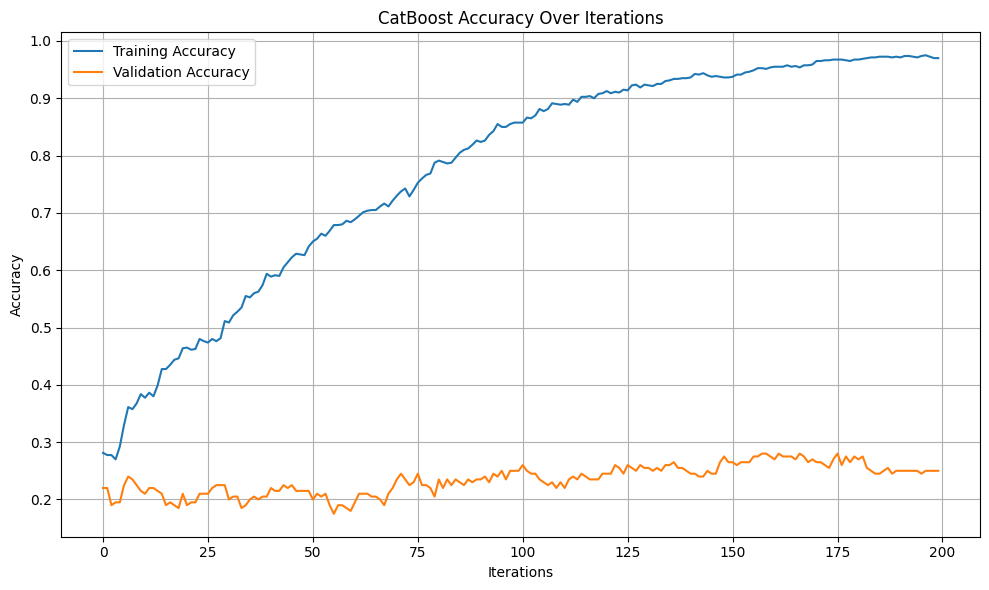

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("sample_data/personalized_fitness_dataset.csv")

# Columns
categorical_features = ["Gender", "Activity_Level", "Diet_Preference", "Chronic_Conditions"]
target_col = "Fitness_Goal"

# Clean categorical columns
df[categorical_features] = df[categorical_features].astype(str).fillna("Unknown")

# Encode target column only
target_encoder = LabelEncoder()
df[target_col] = target_encoder.fit_transform(df[target_col])

# Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale numerical columns only
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Train CatBoost with evaluation logging
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    cat_features=categorical_features,
    verbose=10,
    random_seed=42
)

# Train model
model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# Predict
y_pred = model.predict(X_test).flatten()

# Accuracy and report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

# Print results
print("CatBoost Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

# Plot accuracy graph
evals = model.get_evals_result()
plt.figure(figsize=(10, 6))
plt.plot(evals['learn']['Accuracy'], label='Training Accuracy')
plt.plot(evals['validation']['Accuracy'], label='Validation Accuracy')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("CatBoost Accuracy Over Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("catboost_validation_graph.png")
plt.show()
